In [1]:
import tensorflow as tf
print(tf.__version__)

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=512)]
)

2.3.1


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [3]:
from tensorflow.keras.datasets import cifar100

In [4]:
# Load the CIFAR-100 dataset

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [5]:
# Confirm that reloading the dataset does not require a download

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

#### Examine the Dataset

#### Import the data

The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook.

In [6]:
# Run this cell to connect to your Drive folder

# from google.colab import drive
# drive.mount('/content/gdrive')

In [7]:
# Examine the shape of the data.

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Text(0.5, 0, '41')

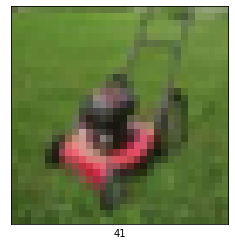

In [8]:
# Examine one of the images and its corresponding label
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[500])
plt.xlabel(train_labels[500][0])

In [9]:
# Load the list of labels from a JSON file

import json

with open('data/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [10]:
# Print a few of the labels

cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [11]:
# Print the corresponding label for the example above

cifar100_fine_labels[41]

'lawn_mower'

#### Load the data using different label modes

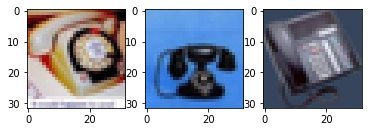

In [12]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [13]:
# Reload the data using the 'coarse' label mode

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='coarse')

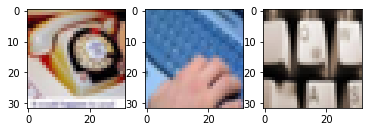

In [14]:
# Display three images from the dataset with the label 6 (index 5)

examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [15]:
# Load the list of coarse labels from a JSON file

with open('data/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [16]:
# Print a few of the labels

cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [17]:
# Print the corresponding label for the example above

print(cifar100_fine_labels[41])
print(cifar100_coarse_labels[test_labels[500][0]])

lawn_mower
large omnivores and herbivores


#### Load the IMDB Dataset

In [18]:
from tensorflow.keras.datasets import imdb

In [58]:
# Load the IMDB dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)
(25000,) (25000,)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [59]:
# Print an example from the training dataset, along with its corresponding label

print(train_data[0:2])
print(train_labels[0])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 825

In [21]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [22]:
# Determine the maximum and minimum sequence length

print(max(sequence_lengths))
print(min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [23]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2)

In [24]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [25]:
# Determine the maximum and minimum sequence length

print(max(sequence_lengths))
print(min(sequence_lengths))

2494
11


In [26]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [27]:
# Remove the oov_char from the sequences using the filter_list function

train_data = filter_list(train_data)


In [28]:
# Get the lengths of the input sequences

sequence_lengths = [len(seq) for seq in train_data]

In [29]:
# Determine the maximum and minimum sequence length
print(max(sequence_lengths))
print(min(sequence_lengths))


1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV

You should store this file in Drive for use in this Colab notebook.

In [31]:
# Run this cell to connect to your Drive folder

# from google.colab import drive
# drive.mount('/content/gdrive')

In [32]:
# Load the fertility dataset

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('data/fertility_Diagnosis.txt', delimiter=',', header=None, names=headers)

In [33]:
# Print the shape of the DataFrame

fertility.shape

(100, 10)

In [34]:
# Show the head of the DataFrame

fertility.head(10)

Season   Age  Diseases  Trauma  Surgery  Fever  Alcohol  Smoking  Sitting  \
0   -0.33  0.69         0       1        1      0      0.8        0     0.88   
1   -0.33  0.94         1       0        1      0      0.8        1     0.31   
2   -0.33  0.50         1       0        0      0      1.0       -1     0.50   
3   -0.33  0.75         0       1        1      0      1.0       -1     0.38   
4   -0.33  0.67         1       1        0      0      0.8       -1     0.50   
5   -0.33  0.67         1       0        1      0      0.8        0     0.50   
6   -0.33  0.67         0       0        0     -1      0.8       -1     0.44   
7   -0.33  1.00         1       1        1      0      0.6       -1     0.38   
8    1.00  0.64         0       0        1      0      0.8       -1     0.25   
9    1.00  0.61         1       0        0      0      1.0       -1     0.25   

  Output  
0      N  
1      O  
2      N  
3      N  
4      O  
5      N  
6      N  
7      N  
8      N  
9      N

#### Process the data

In [35]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1

fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [36]:
# Show the head of the DataFrame

fertility.head()

Season   Age  Diseases  Trauma  Surgery  Fever  Alcohol  Smoking  Sitting  \
0   -0.33  0.69         0       1        1      0      0.8        0     0.88   
1   -0.33  0.94         1       0        1      0      0.8        1     0.31   
2   -0.33  0.50         1       0        0      0      1.0       -1     0.50   
3   -0.33  0.75         0       1        1      0      1.0       -1     0.38   
4   -0.33  0.67         1       1        0      0      0.8       -1     0.50   

   Output  
0     0.0  
1     1.0  
2     0.0  
3     0.0  
4     1.0

In [37]:
# Convert the DataFrame so that the features are mapped to floats

fertility = fertility.astype('float32')

In [38]:
# Shuffle the DataFrame

fertility = fertility.sample(frac=1).reset_index(drop=True)

In [39]:
# Show the head of the DataFrame

fertility.head()

Season   Age  Diseases  Trauma  Surgery  Fever  Alcohol  Smoking  Sitting  \
0   -0.33  0.89       1.0     1.0      0.0    0.0      0.6      1.0     0.31   
1   -0.33  0.67       1.0     1.0      0.0    0.0      0.8     -1.0     0.50   
2   -1.00  0.56       1.0     1.0      0.0    0.0      0.8      1.0     0.50   
3   -0.33  0.50       1.0     0.0      1.0   -1.0      0.8     -1.0     0.50   
4   -1.00  0.53       1.0     1.0      0.0    1.0      0.8     -1.0     0.38   

   Output  
0     0.0  
1     1.0  
2     0.0  
3     0.0  
4     0.0

In [40]:
# Convert the field Season to a one-hot encoded vector

fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [41]:
# Show the head of the DataFrame

fertility.head()

Age  Diseases  Trauma  Surgery  Fever  Alcohol  Smoking  Sitting  Output  \
0  0.89       1.0     1.0      0.0    0.0      0.6      1.0     0.31     0.0   
1  0.67       1.0     1.0      0.0    0.0      0.8     -1.0     0.50     1.0   
2  0.56       1.0     1.0      0.0    0.0      0.8      1.0     0.50     0.0   
3  0.50       1.0     0.0      1.0   -1.0      0.8     -1.0     0.50     0.0   
4  0.53       1.0     1.0      0.0    1.0      0.8     -1.0     0.38     0.0   

   Season_-1.0  Season_-0.33000001311302185  Season_0.33000001311302185  \
0            0                            1                           0   
1            0                            1                           0   
2            1                            0                           0   
3            0                            1                           0   
4            1                            0                           0   

   Season_1.0  
0           0  
1           0  
2           0  
3           0  
4           0

In [42]:
# Move the Output column such that it is the last column in the DataFrame

fertility.columns = [col for col in fertility.columns if col != 'Output'] + ['Output']

In [43]:
# Show the head of the DataFrame

fertility.head()

Age  Diseases  Trauma  Surgery  Fever  Alcohol  Smoking  Sitting  \
0  0.89       1.0     1.0      0.0    0.0      0.6      1.0     0.31   
1  0.67       1.0     1.0      0.0    0.0      0.8     -1.0     0.50   
2  0.56       1.0     1.0      0.0    0.0      0.8      1.0     0.50   
3  0.50       1.0     0.0      1.0   -1.0      0.8     -1.0     0.50   
4  0.53       1.0     1.0      0.0    1.0      0.8     -1.0     0.38   

   Season_-1.0  Season_-0.33000001311302185  Season_0.33000001311302185  \
0          0.0                            0                           1   
1          1.0                            0                           1   
2          0.0                            1                           0   
3          0.0                            0                           1   
4          0.0                            1                           0   

   Season_1.0  Output  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0

In [44]:
# Convert the DataFrame to a numpy array.

fertility = fertility.to_numpy()

#### Split the Data

In [45]:
# Split the dataset into training and validation set

training = fertility[0:70]
validation = fertility[70:100]

In [46]:
# Verify the shape of the training data
training.shape


(70, 13)

In [47]:
# Separate the features and labels for the validation and training data

training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [51]:
# Create a function that returns a generator producing inputs and labels

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size]

In [52]:
# Apply the function to our training features and labels with a batch size of 10

train_generator = get_generator(training_features, training_labels, batch_size=10)

In [53]:
# Test the generator using the next() function

train_batch, labels_batch= next(train_generator)
print(train_batch.shape)
print(labels_batch.shape)

(10, 12)
(10,)


#### Build the model

In [51]:
# Create a model using Keras with 3 layers

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [52]:
# Display the model summary to show the resultant structure

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [53]:
# Create the optimizer object

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [54]:
# Compile the model with loss function and metric

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [55]:
# Calculate the number of training steps per epoch for the given batch size.

batch_size = 5
train_steps = len(training) // batch_size

In [56]:
# Set the epochs to 3
epochs = 3
for epoch in range(epochs):
    train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
    validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
    model.fit_generator(train_generator, steps_per_epoch=train_steps, 
                        validation_data=validation_generator, validation_steps=1)


Instructions for updating:
Please use Model.fit, which supports generators.
14/14 [==============================] - 0s 6ms/step - loss: 0.0537 - accuracy: 0.9857 - val_loss: 0.1846 - val_accuracy: 0.9667


In [57]:
# Train the model

# model.fit_generator(train_generator, epochs=epochs)

In [58]:
# Try to run the fit_generator function once more; observe what happens

# model.fit_generator(train_generator, steps_per_epoch=train_steps)

#### Make an infinitely looping generator

In [59]:
# Create a function that returns an infinitely looping generator

def get_generator_cyclic(features, labels, batch_size=1):
    while True:
        for n in range(int(len(features)/batch_size)):
            yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
        permuted = np.random.permutation(len(features))
        features = features[permuted]
        labels = labels[permuted]

In [60]:
# Create a generator using this function.

train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [61]:
# Assert that the new cyclic generator does not raise a StopIteration

for i in range(2*train_steps):
    next(train_generator_cyclic)

In [62]:
# Generate a cyclic validation generator

validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [63]:
# Train the model


model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps, 
                    validation_data=validation_generator_cyclic, validation_steps=1, epochs=3)

Epoch 1/3
14/14 [==============================] - 0s 6ms/step - loss: 0.0851 - accuracy: 0.9571 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 4ms/step - loss: 0.1082 - accuracy: 0.9571 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 3/3
14/14 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9714 - val_loss: 0.0020 - val_accuracy: 1.0000


#### Evaluate the model and get predictions

In [64]:
# Let's obtain a validation data generator.

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [65]:
# Get predictions on the validation data

predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

Instructions for updating:
Please use Model.predict, which supports generators.
[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0.]


In [66]:
# Print the corresponding validation labels

print(validation_labels)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0.]


In [67]:
# Obtain a validation data generator

validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [68]:
# Evaluate the model

model.evaluate_generator(validation_generator, steps=1)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.006699375808238983, 1.0]

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [69]:
# Run this cell to connect to your Drive folder

# from google.colab import drive
# drive.mount('/content/gdrive')

In [70]:
import matplotlib.pyplot as plt
import numpy as np

#### Load the CIFAR-10 Dataset

In [71]:
from tensorflow.keras.datasets import cifar10

In [72]:
# Load the CIFAR-10 dataset

(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

In [73]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [74]:
print(training_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


#### Create a generator function

In [75]:
# Create a function that returns a data generator

def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [76]:
# Use the function we created to get a training data generator with a batch size of 1

training_generator = get_generator(training_features, training_labels)

In [77]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.

image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


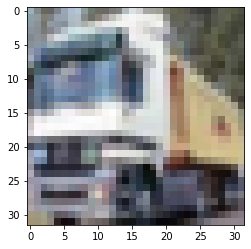

In [78]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label

from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [79]:
# Reset the generator by re-running the `get_generator` function.

train_generator = get_generator(training_features, training_labels)

#### Create a data augmention generator

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
# Create a function to convert an image to monochrome

def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [82]:
# Create an ImageDataGenerator object

image_generator = ImageDataGenerator(
    rotation_range=180,
    rescale=1./255,
    preprocessing_function=monochrome,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)


image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [83]:
# Create an iterable generator using the `flow` function

image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1, shuffle=False)

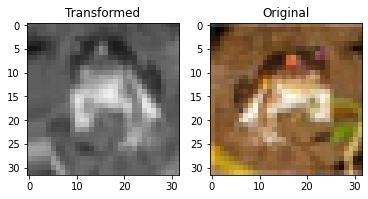

In [84]:
# Show a sample from the generator and compare with the original

image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

文件下载路径： https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

In [85]:
# Inspect the directory structure

train_path = 'data/flowers-recognition/flowers-recognition-split/train'
val_path = 'data/flowers-recognition/flowers-recognition-split/val'

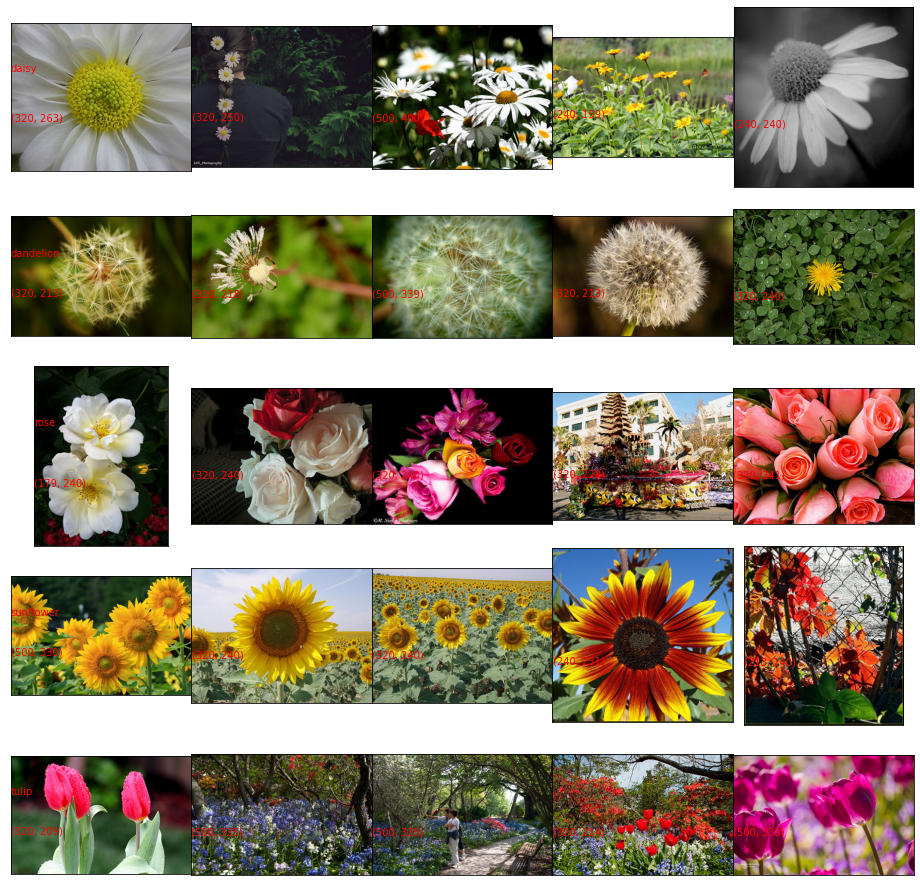

In [86]:
import os
from PIL import Image

plt.figure(figsize=(13,13))

data_path = train_path
i = -1
label_cnt = 5
for label in os.listdir(data_path):
    class_folder = os.path.join(data_path, label)
    if not os.path.isdir(class_folder): continue
    files = os.listdir(class_folder)    
    i = i+1
    if i>=label_cnt: break 
    for j in range(label_cnt):
        plt.subplot(label_cnt, label_cnt, label_cnt*i+j+1)
        plt.tight_layout()
        file_path =  os.path.join(data_path, label, files[j])
        image = Image.open(file_path)
        if j==0: plt.text(0, image.size[1]/3, label, color='red')
        plt.text(0, image.size[1]*2/3, '{}'.format(image.size), color='red')
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])

plt.subplots_adjust(wspace=0, hspace=0)        
plt.show()

In [87]:
# Create an ImageDataGenerator object

datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [88]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [89]:
# Create a training data generator

train_generator = datagenerator.flow_from_directory(
    train_path, 
    batch_size=64, 
    target_size=(64, 64),
    classes = classes,
    class_mode="categorical")

Found 3027 images belonging to 5 classes.


In [90]:
# Create a validation data generator

val_generator = datagenerator.flow_from_directory(
    val_path, 
    batch_size=64, 
    target_size=(64, 64),
    classes = classes,    
    class_mode="categorical")

Found 1296 images belonging to 5 classes.


[1. 0. 0. 0. 0.]


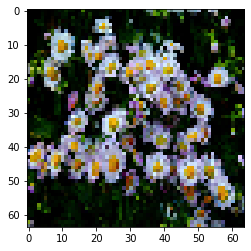

In [91]:
# Get and display an image and label from the training generator

x = next(train_generator)
imshow(x[0][4])
print(x[1][4])

(64, 64, 64, 3) (64, 5)


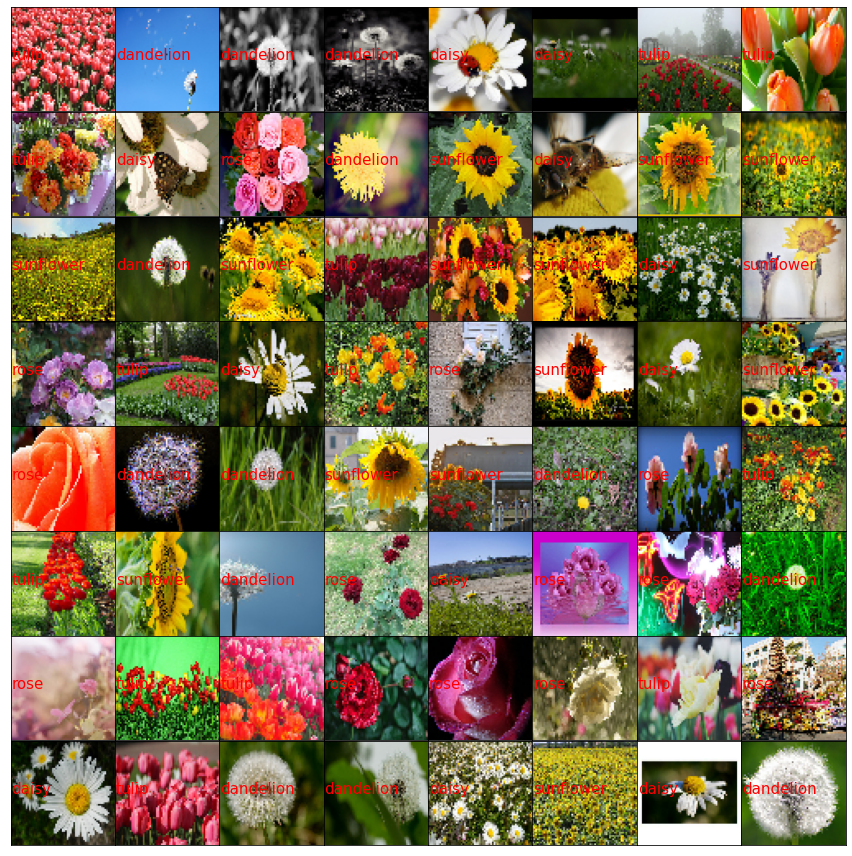

In [92]:
def show_picture(generator):
    plt.figure(figsize=(12, 12))

    images, classes1 = generator.next()
    print(images.shape, classes1.shape)
    for i, image in enumerate(images):
        plt.subplot(8, 8, i+1)
        plt.imshow(image)        
        label = classes[np.argmax(classes1[i])]
        plt.text(0, image.shape[1]/2, label, color='red', size=15)
        plt.xticks([])
        plt.yticks([])    

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)      
    plt.show()

show_picture(train_generator)

In [93]:
# Reset the training generator

train_generator = datagenerator.flow_from_directory(
    train_path, 
    batch_size=64, 
    target_size=(64, 64),
    classes = classes,
    class_mode="categorical")

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [94]:
# Build a CNN model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((64,64,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [95]:
# Create an optimizer object

optimizer = tf.keras.optimizers.Adam(1e-3)

In [96]:
# Compile the model

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 4)           516       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                4

#### Train the model

In [98]:
# Calculate the training generator and test generator steps per epoch

train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [99]:
# Fit the model

model.fit_generator(train_generator, steps_per_epoch=train_steps_per_epoch, 
                    validation_data=val_generator, validation_steps=val_steps, epochs=10)

Epoch 1/10
47/47 [==============================] - 10s 203ms/step - loss: 1.5737 - accuracy: 0.2781 - val_loss: 1.5336 - val_accuracy: 0.2930
Epoch 2/10
47/47 [==============================] - 9s 199ms/step - loss: 1.5123 - accuracy: 0.3014 - val_loss: 1.5018 - val_accuracy: 0.3109
Epoch 3/10
47/47 [==============================] - 9s 197ms/step - loss: 1.4906 - accuracy: 0.3115 - val_loss: 1.4742 - val_accuracy: 0.3234
Epoch 4/10
47/47 [==============================] - 9s 199ms/step - loss: 1.4751 - accuracy: 0.3216 - val_loss: 1.4797 - val_accuracy: 0.3234
Epoch 5/10
47/47 [==============================] - 9s 199ms/step - loss: 1.4478 - accuracy: 0.3550 - val_loss: 1.4453 - val_accuracy: 0.3648
Epoch 6/10
47/47 [==============================] - 9s 198ms/step - loss: 1.4404 - accuracy: 0.3503 - val_loss: 1.4511 - val_accuracy: 0.3680
Epoch 7/10
47/47 [==============================] - 9s 198ms/step - loss: 1.4264 - accuracy: 0.3675 - val_loss: 1.4286 - val_accuracy: 0.3680
Epoch

#### Evaluate the model

In [100]:
# Evaluate the model
print(model.evaluate_generator(val_generator, steps=val_steps))
print(model.evaluate_generator(val_generator))

[1.3844845294952393, 0.43671876192092896]
[1.3892457485198975, 0.43287035822868347]


#### Predict using the generator

In [101]:
# Predict labels with the model

preditions = model.predict_generator(val_generator, steps=1)
print(np.round(preditions, 2))

[[0.3  0.16 0.2  0.09 0.25]
 [0.06 0.08 0.09 0.44 0.34]
 [0.47 0.09 0.11 0.05 0.27]
 [0.03 0.02 0.03 0.61 0.31]
 [0.2  0.21 0.25 0.13 0.21]
 [0.53 0.05 0.07 0.04 0.3 ]
 [0.82 0.05 0.02 0.02 0.09]
 [0.41 0.11 0.14 0.06 0.27]
 [0.38 0.13 0.16 0.07 0.27]
 [0.39 0.23 0.09 0.1  0.19]
 [0.46 0.09 0.12 0.05 0.27]
 [0.15 0.24 0.21 0.14 0.26]
 [0.54 0.07 0.09 0.03 0.27]
 [0.2  0.21 0.25 0.13 0.21]
 [0.2  0.21 0.25 0.13 0.21]
 [0.28 0.17 0.21 0.1  0.24]
 [0.   0.01 0.   0.98 0.01]
 [0.18 0.23 0.23 0.12 0.23]
 [0.2  0.21 0.25 0.13 0.21]
 [0.22 0.22 0.15 0.08 0.33]
 [0.2  0.21 0.25 0.13 0.21]
 [0.2  0.21 0.25 0.13 0.21]
 [0.2  0.21 0.25 0.13 0.21]
 [0.19 0.19 0.24 0.15 0.23]
 [0.24 0.14 0.15 0.19 0.28]
 [0.2  0.21 0.25 0.13 0.21]
 [0.18 0.17 0.23 0.18 0.24]
 [0.28 0.56 0.03 0.07 0.05]
 [0.18 0.23 0.15 0.1  0.34]
 [0.2  0.21 0.25 0.13 0.21]
 [0.16 0.13 0.19 0.24 0.28]
 [0.2  0.21 0.25 0.13 0.21]
 [0.2  0.21 0.25 0.13 0.21]
 [0.31 0.16 0.19 0.09 0.25]
 [0.13 0.11 0.18 0.3  0.28]
 [0.15 0.27 0.21 0.1

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1BAjGPFlpqsDdWof50Ng3Fmju5O8F1_uZ

You should store these files in Drive for use in this Colab notebook.

In [102]:
# Run this cell to connect to your Drive folder

# from google.colab import drive
# drive.mount('/content/gdrive')

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import os

#### Create a simple dataset

In [104]:
x = np.zeros((100,10,2,2))

In [105]:
# Inspect the Dataset object

dataset1 = tf.data.Dataset.from_tensor_slices(x)
print(dataset1.element_spec)
print(dataset1)

TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)
<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>


In [106]:
x2 = (np.zeros((10,2,2)), np.zeros((10,2,2)))
x3 = [np.zeros((10,2,2)), np.zeros((10,2,2))]

In [107]:
# Try creating a dataset from the tensor x2
dataset2 = tf.data.Dataset.from_tensor_slices(x2)
print(dataset2.element_spec)
print(dataset2)

dataset3 = tf.data.Dataset.from_tensor_slices(x3)
print(dataset3.element_spec)
print(dataset3)

# 可以看到turple和list的element_spec是不同的。如果是list，要求list中每个元素都是相同结构的。

(TensorSpec(shape=(2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(2, 2), dtype=tf.float64, name=None))
<TensorSliceDataset shapes: ((2, 2), (2, 2)), types: (tf.float64, tf.float64)>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)
<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>


In [108]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [109]:
# Create another dataset from the new x2 and inspect the Dataset object

dataset2 = tf.data.Dataset.from_tensor_slices(x2)
print(dataset2.element_spec)
print(dataset2)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)
<TensorSliceDataset shapes: (10, 1), types: tf.float64>


In [110]:
# Print the element_spec

print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [111]:
# Combine the two datasets into one larger dataset
x = np.zeros((100,10,2,2))
dataset1 = tf.data.Dataset.from_tensor_slices(x)
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]
dataset2 = tf.data.Dataset.from_tensor_slices(x2)

dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [112]:
# Print the element_spec
print(dataset1.element_spec)
print(dataset2.element_spec)
print(dataset_zipped.element_spec)

TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)
TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)
(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [113]:
# Define a function to find the number of batches in a dataset

def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
#         while next(iter_dataset):
#             i = i+1
        for data in iter_dataset:
            d1, d2 = data
            print(d1.shape)
            print(d2.shape)
            i = i + 1
    except:
        return i

In [114]:
# Find the number of batches in the zipped Dataset

get_batches(dataset_zipped)

(10, 2, 2)
(10, 1)
(10, 2, 2)
(10, 1)
(10, 2, 2)
(10, 1)


#### Create a dataset from numpy arrays

In [115]:
# Load the MNIST dataset

(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [116]:
# Create a Dataset from the MNIST data

mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [117]:
# Inspect the Dataset object

print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [118]:
# Inspect the length of an element using the take method


element = next(iter(mnist_dataset.take(1)))
print(len(element))
print(element[0].shape, element[1].shape)

for x, y in iter(mnist_dataset.take(5)):
    print(x.shape, y.shape)

2
(28, 28) ()
(28, 28) ()
(28, 28) ()
(28, 28) ()
(28, 28) ()
(28, 28) ()


In [119]:
# Examine the shapes of the data

print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [120]:
for f in os.scandir('data/shakespeare'):
    print(type(f))

<class 'posix.DirEntry'>
<class 'posix.DirEntry'>
<class 'posix.DirEntry'>
<class 'posix.DirEntry'>
<class 'posix.DirEntry'>
<class 'posix.DirEntry'>
<class 'posix.DirEntry'>
<class 'posix.DirEntry'>
<class 'posix.DirEntry'>


In [121]:
# Print the list of text files

text_files = sorted([f.path for f in os.scandir('data/shakespeare')])

print(text_files)

['data/shakespeare/tempest.1.1.txt', 'data/shakespeare/tempest.1.2.txt', 'data/shakespeare/tempest.2.1.txt', 'data/shakespeare/tempest.2.2.txt', 'data/shakespeare/tempest.3.1.txt', 'data/shakespeare/tempest.3.2.txt', 'data/shakespeare/tempest.3.3.txt', 'data/shakespeare/tempest.4.1.txt', 'data/shakespeare/tempest.5.1.txt']


In [122]:
# Load the first file using python and print the first 5 lines.

with open(text_files[2], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. Another part of the island.

Enter ALONSO, SEBASTIAN, ANTONIO, GONZALO, ADRIAN, FRANCISCO, and others

GONZALO

Beseech you, sir, be merry; you have cause,

So have we all, of joy; for our escape



In [123]:
# Load the lines from the files into a dataset using TextLineDataset

shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [124]:
# Use the take method to get and print the first 5 lines of the dataset

first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [125]:
# Compute the number of lines in the first file

lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [126]:
# Compute the number of lines in the shakespeare dataset we created

shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [127]:
# Create a dataset of the text file strings

text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'data/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.3.3.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.4.1.txt', shape=(), dtype=string)
tf.Tensor(b'data/shakespeare/tempest.5.1.txt', shape=(), dtype=string)


In [128]:
# Interleave the lines from the text files

interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset.element_spec)

TensorSpec(shape=(), dtype=tf.string, name=None)


In [129]:
# Print the first 10 elements of the interleaved dataset

lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import os

import pandas as pd

#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files in Drive for use in this Colab notebook.

In [131]:
# Run this cell to connect to your Drive folder

# from google.colab import drive
# drive.mount('/content/gdrive')

In [132]:
# Load the CSV file into a pandas DataFrame

bank_dataframe = pd.read_csv('data/bank/bank-full.csv', delimiter=';')

In [133]:
bank_dataframe.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [134]:
# Show the head of the DataFrame

bank_dataframe.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [135]:
# Print the shape of the DataFrame

print(bank_dataframe.shape)

(45211, 17)


In [136]:
# Select features from the DataFrame pandas.dataframe过滤列

features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [137]:
# Show the head of the DataFrame

bank_dataframe.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  campaign  pdays poutcome   y  
0  unknown         1     -1  unknown  no  
1  unknown         1     -1  unknown  no  
2  unknown         1     -1  unknown  no  
3  unknown         1     -1  unknown  no  
4  unknown         1     -1  unknown  no

#### Preprocess the data

In [138]:
tuple(np.random.rand(5,3))

(array([0.43808943, 0.1838112 , 0.13882165]),
 array([0.93560539, 0.65409545, 0.19381064]),
 array([0.30870487, 0.39368179, 0.03470158]),
 array([0.18303967, 0.48891728, 0.71940926]),
 array([0.10187617, 0.10398714, 0.62295266]))

In [139]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    col = encoder.fit_transform(bank_dataframe[feature])
    print(feature, type(col), col.shape)
    col =  tuple(col)
    print(feature, type(col))
    bank_dataframe[feature] = col

default <class 'numpy.ndarray'> (45211, 1)
default <class 'tuple'>
housing <class 'numpy.ndarray'> (45211, 1)
housing <class 'tuple'>
job <class 'numpy.ndarray'> (45211, 12)
job <class 'tuple'>
loan <class 'numpy.ndarray'> (45211, 1)
loan <class 'tuple'>
education <class 'numpy.ndarray'> (45211, 4)
education <class 'tuple'>
contact <class 'numpy.ndarray'> (45211, 3)
contact <class 'tuple'>
poutcome <class 'numpy.ndarray'> (45211, 4)
poutcome <class 'tuple'>


In [140]:
# Show the head of the DataFrame

bank_dataframe.head()
for column in bank_dataframe.columns:
    col = bank_dataframe[column]
    print(column, type(col), col.dtype, col.shape)

age <class 'pandas.core.series.Series'> int64 (45211,)
job <class 'pandas.core.series.Series'> object (45211,)
marital <class 'pandas.core.series.Series'> object (45211,)
education <class 'pandas.core.series.Series'> object (45211,)
default <class 'pandas.core.series.Series'> object (45211,)
balance <class 'pandas.core.series.Series'> int64 (45211,)
housing <class 'pandas.core.series.Series'> object (45211,)
loan <class 'pandas.core.series.Series'> object (45211,)
contact <class 'pandas.core.series.Series'> object (45211,)
campaign <class 'pandas.core.series.Series'> int64 (45211,)
pdays <class 'pandas.core.series.Series'> int64 (45211,)
poutcome <class 'pandas.core.series.Series'> object (45211,)
y <class 'pandas.core.series.Series'> object (45211,)


In [144]:
# Shuffle the DataFrame

bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True)
bank_dataframe.head()

age                                   job  marital     education default  \
0   41  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)   single  (0, 0, 1, 0)    (0,)   
1   42  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)  married  (0, 0, 1, 0)    (0,)   
2   40  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)  married  (0, 0, 1, 0)    (0,)   
3   37  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  married  (0, 1, 0, 0)    (0,)   
4   25  (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   single  (0, 1, 0, 0)    (0,)   

   balance housing  loan    contact  campaign  pdays      poutcome    y  
0     1646    (1,)  (0,)  (1, 0, 0)         1     90  (0, 0, 1, 0)  yes  
1     1093    (1,)  (0,)  (0, 0, 1)         1     -1  (0, 0, 0, 1)   no  
2      315    (0,)  (0,)  (1, 0, 0)         1     -1  (0, 0, 0, 1)   no  
3      764    (1,)  (0,)  (1, 0, 0)         5     -1  (0, 0, 0, 1)   no  
4      335    (1,)  (0,)  (0, 0, 1)         1     -1  (0, 0, 0, 1)   no

In [145]:
bank_dataframe1 = pd.read_csv('data/bank/bank-full.csv', delimiter=';')
bank_dataframe1 = pd.get_dummies(bank_dataframe1)
bank_dataframe1.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1     -1         0           0   
1   44       29    5       151         1     -1         0           0   
2   33        2    5        76         1     -1         0           0   
3   47     1506    5        92         1     -1         0           0   
4   33        1    5       198         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_may  month_nov  month_oct  \
0                0                 0  ...          1          0          0   
1                0                 0  ...          1          0          0   
2                0                 1  ...          1          0          0   
3                1                 0  ...          1          0          0   
4                0                 0  ...          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcome_unknown  y_no  y_yes  
0                 1     1      0  
1                 1     1      0  
2                 1     1      0  
3                 1     1      0  
4                 1     1      0  

[5 rows x 53 columns]

#### Create the Dataset object

In [146]:
bank_dataframe

age                                   job   marital     education  \
0       41  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)    single  (0, 0, 1, 0)   
1       42  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)   married  (0, 0, 1, 0)   
2       40  (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)   married  (0, 0, 1, 0)   
3       37  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   married  (0, 1, 0, 0)   
4       25  (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)    single  (0, 1, 0, 0)   
...    ...                                   ...       ...           ...   
45206   55  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   married  (0, 1, 0, 0)   
45207   34  (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)   married  (1, 0, 0, 0)   
45208   29  (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)    single  (0, 0, 0, 1)   
45209   58  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)   married  (0, 0, 0, 1)   
45210   39  (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)  divorced  (0, 0, 1, 0)   

      default  balance housing  loan    contact  campaign  pdays  \
0        (0,)     1646    (1,)  (0,)  (1, 0, 0)         1     90   
1        (0,)     1093    (1,)  (0,)  (0, 0, 1)         1     -1   
2        (0,)      315    (0,)  (0,)  (1, 0, 0)         1     -1   
3        (0,)      764    (1,)  (0,)  (1, 0, 0)         5     -1   
4        (0,)      335    (1,)  (0,)  (0, 0, 1)         1     -1   
...       ...      ...     ...   ...        ...       ...    ...   
45206    (0,)      128    (0,)  (0,)  (1, 0, 0)         2     -1   
45207    (0,)      275    (1,)  (0,)  (0, 0, 1)         1     -1   
45208    (0,)     2083    (1,)  (0,)  (0, 0, 1)         2     -1   
45209    (0,)     1547    (0,)  (0,)  (0, 1, 0)         4     -1   
45210    (0,)     1832    (0,)  (0,)  (0, 0, 1)         2     -1   

           poutcome    y  
0      (0, 0, 1, 0)  yes  
1      (0, 0, 0, 1)   no  
2      (0, 0, 0, 1)   no  
3      (0, 0, 0, 1)   no  
4      (0, 0, 0, 1)   no  
...             ...  ...  
45206  (0, 0, 0, 1)   no  
45207  (0, 0, 0, 1)   no  
45208  (0, 0, 0, 1)   no  
45209  (0, 0, 0, 1)  yes  
45210  (0, 0, 0, 1)   no  

[45211 rows x 13 columns]

In [147]:
# Convert the DataFrame to a Dataset


# bank_dataset = tf.data.Dataset.from_tensor_slices(dict(bank_dataframe)) # work on tf 2.0
bank_dataset = tf.data.Dataset.from_tensor_slices(bank_dataframe.to_dict('list')) # # work on tf 2.3

In [148]:
# Inspect the Dataset object
print(iter(bank_dataset).next())
bank_dataset.element_spec

{'age': <tf.Tensor: shape=(), dtype=int32, numpy=41>, 'job': <tf.Tensor: shape=(12,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)>, 'marital': <tf.Tensor: shape=(), dtype=string, numpy=b'single'>, 'education': <tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 1, 0], dtype=int32)>, 'default': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, 'balance': <tf.Tensor: shape=(), dtype=int32, numpy=1646>, 'housing': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>, 'loan': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, 'contact': <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 0, 0], dtype=int32)>, 'campaign': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'pdays': <tf.Tensor: shape=(), dtype=int32, numpy=90>, 'poutcome': <tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 1, 0], dtype=int32)>, 'y': <tf.Tensor: shape=(), dtype=string, numpy=b'yes'>}


{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [149]:
# First check that there are records in the dataset for non-married individuals

def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'single'


In [150]:
# Filter the Dataset to retain only entries with a 'divorced' marital status

bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [151]:
# Check the records in the dataset again

check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [152]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'
# 看来map_label1里面的复杂写法，完全可以用map_label2来替换
def map_label1(x):
    x['y'] = 0 if x['y'] == tf.constant([b'no'], dtype=tf.string) else 1
    return x
    
    
def map_label2(x):
    x['y'] = 0 if x['y'] == 'no' else 1
    return x
    
bank_dataset1 = bank_dataset.map(map_label1)    
bank_dataset2 = bank_dataset.map(map_label2) 

In [153]:
# Inspect the Dataset object
from pprint import pprint 
pprint(bank_dataset.element_spec['y'])
pprint(bank_dataset1.element_spec['y'])

print('-'*50)
for data in iter(bank_dataset.take(10)):    
    print(data['y'])
print('-'*50)    
for data in iter(bank_dataset1.take(10)):    
    print(data['y'])
print('-'*50)    
for data in iter(bank_dataset2.take(10)):    
    print(data['y'])
    
bank_dataset1.element_spec 

TensorSpec(shape=(), dtype=tf.string, name=None)
TensorSpec(shape=(), dtype=tf.int32, name=None)
--------------------------------------------------
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
tf.Tensor(b'no', shape=(), dtype=string)
--------------------------------------------------
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
-------------------------------

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [154]:
# Remove the 'marital' column

      
bank_dataset = bank_dataset1.map(lambda x: {key:val for key,val in x.items() if key != 'marital'}) 

In [155]:
# Inspect the Dataset object

bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [156]:
# Create an input and output tuple for the dataset

def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [157]:
# Map this function over the dataset

bank_dataset = bank_dataset1.map(map_feature_label) 

In [158]:
# Inspect the Dataset object

bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [159]:
# Determine the length of the Dataset

dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [160]:
# Make training and validation sets from the dataset
training_elements = int(dataset_length*0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

Now let's build a model to classify the features.

In [161]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [162]:
# Compile the model

optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [163]:
# Show the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 400)               12400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dense_6 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_4 (Batch (None, 400)               1600      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
____________________________________________

#### Train the model

In [164]:
# Create batched training and validation datasets
train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)


In [165]:
# Shuffle the training data

train_dataset = train_dataset.shuffle(1000)

In [169]:
# Fit the model

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 3s 14ms/step - loss: 0.6650 - accuracy: 0.6316 - val_loss: 0.5828 - val_accuracy: 0.7537
Epoch 2/5
182/182 [==============================] - 2s 13ms/step - loss: 0.4815 - accuracy: 0.8198 - val_loss: 0.4625 - val_accuracy: 0.8503
Epoch 3/5
182/182 [==============================] - 2s 14ms/step - loss: 0.3748 - accuracy: 0.8907 - val_loss: 0.4363 - val_accuracy: 0.8740
Epoch 4/5
182/182 [==============================] - 2s 14ms/step - loss: 0.3062 - accuracy: 0.9159 - val_loss: 0.3785 - val_accuracy: 0.8810
Epoch 5/5
182/182 [==============================] - 2s 13ms/step - loss: 0.2596 - accuracy: 0.9250 - val_loss: 0.3844 - val_accuracy: 0.8759


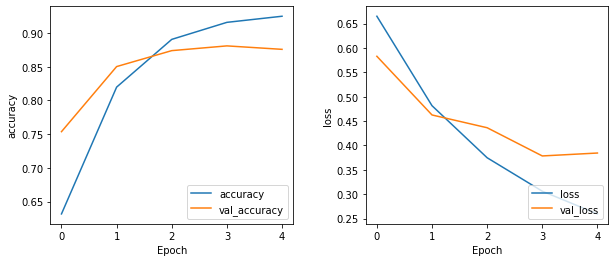

In [182]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(hspace=0.2, wspace=0.3)

for i, (metric, ax) in enumerate(zip(['accuracy', 'loss'], axes.flat)):
    ax.plot(history.history[metric], label=metric)
    ax.plot(history.history['val_'+metric], label = 'val_'+metric)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)
    ax.legend(loc='lower right')
    
plt.show()